In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- 훈련 세트에서 학습한 통계 값으로 테스트 세트 변환하기!!

In [7]:
from sklearn.linear_model import SGDClassifier

In [12]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.7


C:\Users\82109\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_stochastic_gradient.py:703: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- loss=log : 클래스마다 이진 분류 모델을 만듬 -> 도미는 양성클래스로 두고 나머지 모두 음성 클래스로 두는 방식 : OvR(One versus Rest)

- ConvergenceWarning : 모델이 충분히 수렴하지 않았는 경고 -> max_iter 매개변수 값을 늘려주는 것이 좋다.

In [13]:
sc.partial_fit(train_scaled, train_target) # 추가로 더 훈련
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7563025210084033
0.675


In [14]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

- train_target에 있는 7개 생선의 목록을 만듬
- 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록을 위해 2개의 리스트 준비 

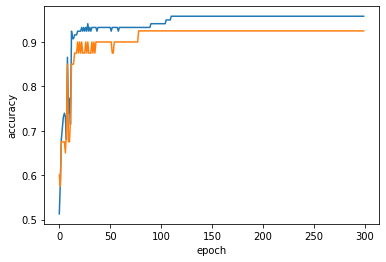

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

- epoch=100이 적절한 반복횟수

In [20]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.925


- SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
- tol : 향상될 최솟값 지정, None으로 지정하여 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복
- SGDRegressor도 동일

- loss의 default 값은 hinge(SVM)

In [21]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9327731092436975
0.9
